# UMC 203: Artificial Intelligence and Machine Learning
# Assignment 1



## Setup

Please run the code below *after modifying it* appropriately every time you connect to an environment.

In [10]:
# 1. [TODO by yourself] Upload the zip file provided as part of the assignment onto your google drive. Do this by uploading the file to your drive.
# 2. Connect the google drive to the colab
from google.colab import drive
drive.mount('/content/drive')
# 3. copy the zip file into the current working directory
!cp /content/drive/MyDrive/AIML_A1.zip .
# eg. !cp /content/drive/MyDrive/AIML_A1.zip .
# extract the zip file
!unzip AIML_A1.zip
# eg. !unzip A1.zip

Mounted at /content/drive
Archive:  AIML_A1.zip
   creating: pyarmor_runtime_000000/
  inflating: pyarmor_runtime_000000/pyarmor_runtime.so  
  inflating: pyarmor_runtime_000000/__init__.py  
   creating: pyarmor_runtime_000000/__pycache__/
  inflating: pyarmor_runtime_000000/__pycache__/__init__.cpython-311.pyc  
  inflating: diabetes.csv            
  inflating: oracle.py               


In [156]:
import oracle as AIML_A1

## Question 1: Naive Bayes

In [157]:
# Instructions and calling conventions for the different functions

# PLEASE PROVIDE YOUR OWN SR NUMBERS TO ALL FUNCTIONS
mysrn = 22244

# q1_get_loss provides l(0,1) and l(1,0) in the setting discussed in the assignment
# help(AIML_A1.q1_get_loss)
help(AIML_A1.q1_get_loss)
# eg:
l1, l2 = AIML_A1.q1_get_loss(mysrn)
print(f"l(0,1)={l1}, l(1,0)={l2}")

# q1_get_train_set returns a training set wih the number of required samples
help(AIML_A1.q1_get_train_set)
q1_train_data_5 = AIML_A1.q1_get_train_set(mysrn,5)
print(q1_train_data_5)
print(q1_train_data_5[0][0])
print(q1_train_data_5[0][1])

# q1_get_test_set returns the test set
help(AIML_A1.q1_get_test_set)
q1_test_data = AIML_A1.q1_get_test_set(mysrn)
print(q1_test_data[:5])

Help on function q1_get_loss in module oracle:

q1_get_loss(srn: int) -> tuple[int, int]
    srn: 5 digit number.
    
    Returns a 2-tuple.
    The first element of the tuple is l(0,1) and the second is l(1,0)

l(0,1)=6, l(1,0)=5
Help on function q1_get_train_set in module oracle:

q1_get_train_set(srn: int, num_samples: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    num_samples: Number of test samples required.
    
    This function returns `num_samples' instances of data drawn from 
    the distribution described in the assignment.
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or 0)

[(array([ 0.32049, -0.00592, -3.46038, -0.9931 ,  0.78152]), 1.0), (array([-0.15295, -2.43827, -4.1661 , -1.9375 , -1.43961]), 0.0), (array([-0.50288,  0.53083,  3.73999,  3.73911,  2.48529]), 1.0), (array([ 0.29309, -0.94081,  1.27902,  2.62042, -0.03486]), 0.0), (array([ 0.2778 , -2.89265, -1.24345, 

In [158]:
#Solution for 1(c)
import numpy as np
import math

In [171]:
sample_sizes=[2,10,20,50,100,500,1000]
import numpy as np
import matplotlib.pyplot as plt
Estimate0=[]
Estimate1=[]
for n in sample_sizes:
  data=AIML_A1.q1_get_train_set(mysrn,n)
  X = np.array([d[0] for d in data])  # Extract features
  y = np.array([d[1] for d in data])  # Extract labels)
  sum0=np.array([0,0,0,0,0])
  sum1=np.array([0,0,0,0,0])
  count0=0
  count1=0
  for i in range(len(y)):
    if y[i]==0:
      count0+=1
      sum0=sum0+X[i]
    if y[i]==1:
      sum1=sum1+X[i]
      count1+=1
  mean0=sum0/count0
  mean1=sum1/(count1)
  variance0=0
  variance1=0
  for i in range(len(y)):
    if y[i]==0:
      diff0=(X[i]-mean0)
      variance0+=np.outer(diff0,diff0.T)
    if y[i]==1:
      diff1=(X[i]-mean1)
      variance1+=np.outer(diff1,diff1.T)
  variance0=variance0/count0
  variance1=variance1/count1
  Estimate0.append([mean0,variance0]) #Create a list of estimates of class 0
  Estimate1.append([mean1,variance1]) #Create a list of estimates of class 1




In [160]:
#Solution to 1(d). We store the classification done by our system and check later the loss on each estimates
dataset=AIML_A1.q1_get_test_set(mysrn)
total_loss=[]
for n in range(len(Estimate0)):
  lossfar=0
  count=0
  for x in dataset:

    #Assume non-diagonal entries to 0
    variance0=np.diag(np.diag(Estimate0[n][1]))
    variance1=np.diag(np.diag(Estimate1[n][1]))

    diff0 = x[0] - Estimate0[n][0]
    diff1 = x[0] - Estimate1[n][0]

    inverse_variance0 = np.linalg.inv(variance0)
    inverse_variance1 = np.linalg.inv(variance1)

    exponential_factor = 0.5 * np.matmul(diff1,(np.matmul(inverse_variance0,diff1.T)))-0.5 * np.matmul(diff0,(np.matmul(inverse_variance0,diff0.T)))

    Determinant_variance0 = np.linalg.norm(Estimate0[n][1])
    Determinant_variance1 = np.linalg.norm(Estimate1[n][1])

    Probability_Ratio= math.sqrt(Determinant_variance1/Determinant_variance0)*math.exp(exponential_factor)

    #Define the classifier and check for total loss
    if Probability_Ratio<(6/5):
      classifier=1
    else:
      classifier=0

    #if it is correct, no point rewarded
    loss=0
    if classifier==0 and x[1]==1: #l(0,1)=6
      loss=6
      count+=1
    if classifier==1 and x[1]==0: #l(1,0)=5
      loss=5
      count+=1

    #loss so far in dataset
    lossfar+=loss

  print([count,lossfar])
  total_loss.append(lossfar)
print(total_loss)
print(len(dataset))






[43, 250]
[19, 99]
[18, 95]
[16, 85]
[14, 76]
[16, 87]
[17, 93]
[250, 99, 95, 85, 76, 87, 93]
200


## CIFAR10 classification

Help on function q1_get_cifar10_train_test in module oracle:

q1_get_cifar10_train_test(srn: int) -> tuple[list[tuple[numpy.ndarray, int]], list[tuple[numpy.ndarray, int]]]
    srn: 5 digit number.
    
    This function returns 2000 training samples each from 2 classes of the CIFAR10 dataset and a test set
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or 0)

Files already downloaded and verified
Files already downloaded and verified


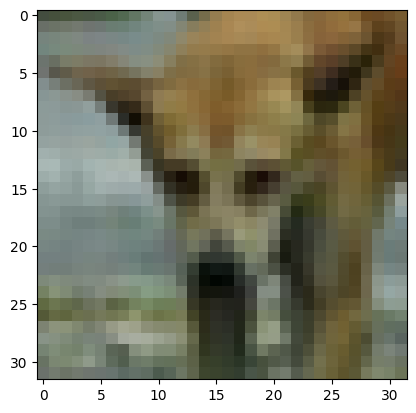

In [161]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

help(AIML_A1.q1_get_cifar10_train_test)
cifar10_train, cifar10_test = AIML_A1.q1_get_cifar10_train_test(mysrn)

# plot an example images
plt.imshow(Image.fromarray(cifar10_train[0][0].reshape(32,32,3).astype(np.uint8)))
plt.show()

In [206]:

import numpy as np
import matplotlib.pyplot as plt
Estimate0=[]
Estimate1=[]

data,test=AIML_A1.q1_get_cifar10_train_test(mysrn)

n=len(data)//2
data0 = [i[0] for i in data if i[1] == 0.0]
data1 = [i[0] for i in data if i[1] == 1.0]

mean0=np.zeros(len(data0[0]))
mean1=np.zeros(len(data0[0]))

for i in range(n):
  mean0+=data0[i]
  mean1+=data1[i]

mean0=mean0/n
mean1=mean1/n

variance0=0
variance1=0
for i in range(n):
      diff0=(data0[i]-mean0)
      variance0+=np.outer(diff0,diff0.T)
      diff1=(data1[i]-mean1)
      variance1+=np.outer(diff1,diff1.T)

variance0=variance0/n
variance1=variance1/n

variance0=np.diag(np.diag(variance0))
variance1=np.diag(np.diag(variance1))

inverse_variance0 = np.linalg.inv(variance0)
inverse_variance1 = np.linalg.inv(variance1)

Determinant_variance0 = np.linalg.norm(variance0)
Determinant_variance1 = np.linalg.norm(variance1)


Files already downloaded and verified
Files already downloaded and verified


In [210]:
import math
lossfar=0
count=0

for i in range(len(data)):

    #Assume non-diagonal entries to 0

    diff0 = data[i][0] - mean0
    diff1 = data[i][0] - mean1

    exponential_factor = 0.5 * np.dot(diff1.T,(np.dot(inverse_variance0,diff1)))-0.5 * np.dot(diff0.T,(np.dot(inverse_variance0,diff0)))

    Probability_Ratio= (1/2)*math.log(Determinant_variance1/Determinant_variance0)+exponential_factor


    #Define the classifier and check for total loss
    if Probability_Ratio<math.log(6/5):
      classifier=1
    else:
      classifier=0

    #if it is correct, no point rewarded
    loss=0
    if classifier==0 and data[i][1]==1: #l(0,1)=6
      loss=6
      count+=1
    if classifier==1 and data[i][1]==0: #l(1,0)=5
      loss=5
      count+=1

    #loss so far in dataset
    lossfar+=loss

print(count)
print(lossfar)


[0, 0.0]
[1, 1.0]
[0, 1.0]
[1, 1.0]
[0, 0.0]
[0, 1.0]
[0, 0.0]
[0, 1.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[1, 1.0]
[1, 1.0]
[1, 1.0]
[1, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 1.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 0.0]
[0, 0.0]
[1, 0.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[1, 1.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[0, 1.0]
[1, 0.0]
[0, 0.0]
[1, 1.0]
[0, 1.0]
[0, 0.0]
[1, 1.0]
[0, 1.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[0, 1.0]
[1, 1.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 0.0]
[0, 1.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[1, 1.0]
[0, 0.0]
[1, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[1, 0.0]
[0, 1.0]
[1, 0.0]
[1, 0.0]
[0, 0.0]
[0, 1.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[1, 1.0]
[1, 1.0]
[0, 0.0]
[1, 1.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[1, 1.0]
[0, 0.0]
[0, 0.0]
[0, 0.0]
[0, 1.0]
[0, 0.0]
[0, 0.0]
[

In [ ]:
# To save all the images, run the following code block
!mkdir class0 class1
for i,(x,y) in enumerate(cifar10_train):
  plt.imshow(Image.fromarray(x.reshape(32,32,3).astype(np.uint8)))
  plt.savefig(f"class{int(y)}/{i}.jpg")

NameError: name 'cifar10_train' is not defined

# Question 2

In [ ]:
help(AIML_A1.q2_perceive)
perceptron_data = AIML_A1.q2_perceive(mysrn)
print(perceptron_data[:5])

Help on function q2_perceive in module oracle:

q2_perceive(srn) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    This function returns the dataset for question 2
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or -1)

[(array([ 0.00608,  0.02983, -2.1766 ,  0.87107, -0.62298]), -1.0), (array([ 0.74261, -0.5785 , -1.70103,  0.31124,  0.36667]), -1.0), (array([ 1.26968,  0.68849,  1.76279, -0.96689, -0.30184]), 1.0), (array([ 0.62566, -0.40398, -0.81604,  0.82741,  1.57273]), 1.0), (array([-0.92388, -0.10127, -2.86961, -0.43717, -0.64716]), -1.0)]


In [ ]:
#Implementing Perceptron Algorithm
dataset=AIML_A1.q2_perceive(mysrn)
n=len(dataset[0][0])
weights=np.zeros(n)
weights_copy=np.zeros(n)
maxiter=1000
flag=0
count=1
while flag!=1:
  for j in range(len(dataset)):
    val=dataset[j][1]*np.matmul(weights.T,dataset[j][0])
    if val<=0:
      weights=weights+np.dot(dataset[j][1],dataset[j][0])
      count+=1
  if np.linalg.norm(weights-weights_copy)<1e-10:
    flag=1
  else:
    weights_copy=weights

print(weights_copy)
print("Count is",count)




[34.73074 34.87084 35.18411 20.89604 20.79986]
Count is 1573


In [ ]:
#Code to find margin and convergence step
V=[]
R=[]
for j in range(len(dataset)):
  v=dataset[j][1]*np.matmul(weights_copy.T,dataset[j][0])
  radius=np.linalg.norm(dataset[j][0])
  v=v/np.linalg.norm(weights_copy)

  V.append(v)
  R.append(radius)
minV=min(V) #Margin
minR=min(R) #Radius
stepsno=(minR/minV)*(minR/minV)
print(minV)
print(minR)
print(stepsno)


0.0001951635771629387
0.40944837305819154
4401500.546687227


## Perceiving MNIST

In [ ]:
help(AIML_A1.q2_mnist)
mnist_data = AIML_A1.q2_mnist(mysrn)
print(perceptron_data[:5])

Help on function q2_mnist in module oracle:

q2_mnist(srn) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x from MNIST and the second is the label, (1 or -1)

[(array([ 0.00608,  0.02983, -2.1766 ,  0.87107, -0.62298]), -1.0), (array([ 0.74261, -0.5785 , -1.70103,  0.31124,  0.36667]), -1.0), (array([ 1.26968,  0.68849,  1.76279, -0.96689, -0.30184]), 1.0), (array([ 0.62566, -0.40398, -0.81604,  0.82741,  1.57273]), 1.0), (array([-0.92388, -0.10127, -2.86961, -0.43717, -0.64716]), -1.0)]


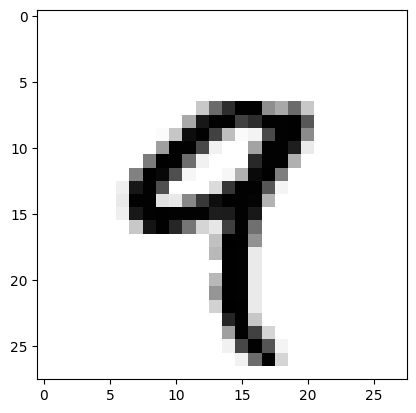

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0][0].reshape(28,28),cmap=plt.cm.gray_r,interpolation="nearest")

In [ ]:
#Implementing Perceptron Algorithm
dataset=AIML_A1.q2_mnist(mysrn)
n=len(dataset[0][0])
weights=np.zeros(n)
weights_copy=np.zeros(n)
maxiter=1000
flag=0
count=1
while flag!=1:
  for j in range(len(dataset)):
    val=dataset[j][1]*np.matmul(weights.T,dataset[j][0])
    if val<=0:
      weights=weights+np.dot(dataset[j][1],dataset[j][0])
      count+=1
  if np.linalg.norm(weights-weights_copy)<1e-10:
    flag=1
  else:
    weights_copy=weights

print(weights_copy)
filename = "AIML_2024_A1_22244_q2_w.csv"
delimiter = ","  # Change this if needed, default is comma

# Save the data using savetxt
np.savetxt(filename, weights_copy, delimiter=delimiter)

print(f"Data saved to {filename}")
print("Count is",count)


[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000

In [ ]:
#Code to find margin and convergence step
V=[]
R=[]
for j in range(len(dataset)):
  v=dataset[j][1]*np.matmul(weights_copy.T,dataset[j][0])
  radius=np.linalg.norm(dataset[j][0])
  v=v/np.linalg.norm(weights_copy)

  V.append(v)
  R.append(radius)
minV=min(V) #Margin
minR=min(R) #Radius
stepsno=(minR/minV)*(minR/minV)
print(minV)
print(minR)
print(stepsno)

2.5894659108547295
1195.2727722156144
213065.75678087506


#Question 3 : Fisher Linear Discriminant

Part A : Fisher on IRIS Dataset

In [13]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from numpy.linalg import inv

In [14]:
# Loading Iris Dataset
iris_dataset = load_iris()
data = iris_dataset.data
label = iris_dataset.target
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#Preparing train dataset for setosa and virginica
X_train = np.concatenate((data[0:50],data[50:100]),axis=0)
print(X_train.shape)


(100, 4)


In [16]:
data.shape

(150, 4)

Your implementation starts here.

Do not use already available implementation of fisher discriminant from libraries like scikit-learn.

You can use numpy to perform computations and matplotlib for plotting.

In [17]:

#Find the w to project the data to single dimension


y_train = np.concatenate((label[0:50],label[50:100]), axis=0)

n=len(X_train[0])

sum0=np.zeros(n)
sum1=np.zeros(n)
count0=0
count1=0

for i in range(len(y_train)):
  if y_train[i]==0:
    count0+=1
    sum0=sum0+X_train[i]
  if y_train[i]==1:
    sum1=sum1+X_train[i]
    count1+=1
mean_0=sum0/count0
mean_1=sum1/(count1)

variance0=0
variance1=0
count0=0
count1=0

for i in range(len(X_train)):
    if y_train[i]==0:
      diff0=(X_train[i]-mean_0)
      count0+=1
      variance0+=np.outer(diff0,diff0.T)
    if y_train[i]==1:
      diff1=(X_train[i]-mean_1)
      count1+=1
      variance1+=np.outer(diff1,diff1.T)
variance0=variance0/count0
variance0=variance1/count1

S_w=variance0+variance1
S_b=mean_0-mean_1
InverseS_w=np.linalg.inv(S_w)
w=np.matmul(InverseS_w,S_b)
w=w/np.linalg.norm(w)

print(w)


[ 0.11332533  0.60270643 -0.32326528 -0.72069542]


In [18]:
#Project the data and find the threshold for classification with minimum error.
b = (mean_0 @ w + mean_1 @ w) / 2
print(b)

0.9964615551352254


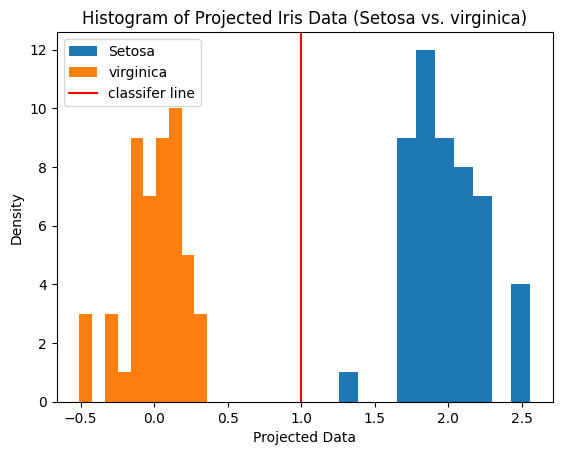

Projection vector (w): [ 0.11332533  0.60270643 -0.32326528 -0.72069542]
Threshold (b): 0.9964615551352254


In [19]:
#Plot the histogram of the projected data and the classification boundary.
#Use matplot lib for plotting.
#while plotting histogram give different color for different classes and also add legend.
#you can refer :- https://matplotlib.org/stable/gallery/text_labels_and_annotations/index.html
projected_data = X_train @ w


# Plot the histogram with different colors for classes
plt.hist(projected_data[y_train == 0], label="Setosa", alpha=1)
plt.hist(projected_data[y_train == 1], label="virginica", alpha=1)
plt.xlabel("Projected Data")
plt.ylabel("Density")
plt.title("Histogram of Projected Iris Data (Setosa vs. virginica)")

plt.axvline(x=b,color='red',label='classifer line')
plt.legend()
plt.show()

print("Projection vector (w):", w)
print("Threshold (b):", b)

Part B: Fisher on custom Dataset

In [20]:
#Load train Dataset
help(AIML_A1.q3_get_data)
data_for_fisher = AIML_A1.q3_get_data(mysrn)
print(data_for_fisher[:5])
print(data_for_fisher)

Help on function q3_get_data in module oracle:

q3_get_data(srn: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Help:
    This function returns the training dataset for question 4
    It returns a list containing all the data points.
    Each entry of the list is a tuple of two elements;
    the first element is the 2-dimensional data $[x_1,x_2]$,
    and the second element is the label ($1$ or $0$).

[(array([-0.06896063,  0.36150428]), 1.0), (array([-0.72896863, -0.68454711]), 0.0), (array([-0.48175367,  0.87630668]), 0.0), (array([0.23458667, 0.28356658]), 1.0), (array([0.90482705, 0.42577929]), 0.0)]
[(array([-0.06896063,  0.36150428]), 1.0), (array([-0.72896863, -0.68454711]), 0.0), (array([-0.48175367,  0.87630668]), 0.0), (array([0.23458667, 0.28356658]), 1.0), (array([0.90482705, 0.42577929]), 0.0), (array([0.36802298, 0.        ]), 1.0), (array([-0.80901699,  0.58778525]), 0.0), (array([ 0.63742399, -0.77051324]), 0.0), (array([ 0.06279052, -0.998026

[0.66436384 0.74740932]
2.7832574279571255e-17


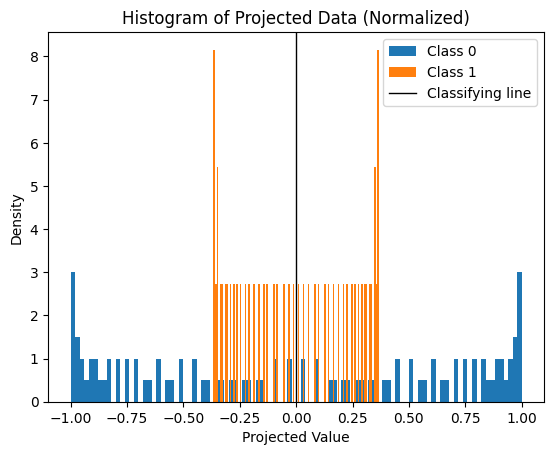

In [21]:
#Find Normalized Projection vestor w and check if the data is linealrly separable.
X_train = data_for_fisher
n=len(X_train[0][0])

sum0=np.zeros(n)
sum1=np.zeros(n)
count0=0
count1=0

for i in range(len(X_train)):
  if X_train[i][1]==0:
    count0+=1
    sum0=sum0+X_train[i][0]
  if X_train[i][1]==1:
    sum1=sum1+X_train[i][0]
    count1+=1
mean_0=sum0/count0
mean_1=sum1/(count1)

variance0=0
variance1=0
count0=0
count1=0

for i in range(len(X_train)):
    if X_train[i][1]==0:
      diff0=(X_train[i][0]-mean_0)
      count0+=1
      variance0+=np.outer(diff0,diff0.T)
    if X_train[i][1]==1:
      diff1=(X_train[i][0]-mean_1)
      count1+=1
      variance1+=np.outer(diff1,diff1.T)
variance0=variance0/count0
variance0=variance1/count1

S_w=variance0+variance1
S_b=mean_0-mean_1
InverseS_w=np.linalg.inv(S_w)
w=np.matmul(InverseS_w,S_b)
w=w/np.linalg.norm(w)

print(w)
b = (mean_0 @ w + mean_1 @ w) / 2
print(b)
X=[]
Y=[]
for x in X_train:
  X.append(x[0])
  Y.append(x[1])
projected_data = X @ w
# Separate data points based on their class labels
class0_data = [data for data, label in zip(projected_data, Y) if label == 0]
class1_data = [data for data, label in zip(projected_data, Y) if label == 1]

# Plot histograms for each class
plt.hist(class0_data, label="Class 0", density=True, bins=100)  # Normalize for better comparison
plt.hist(class1_data, label="Class 1", density=True, bins=100)  # Normalize for better comparison

# Add vertical line at the calculated threshold (b)
plt.axvline(x=b, color='black',  linewidth=1, label="Classifying line")

# Add labels and title
plt.xlabel("Projected Value")
plt.ylabel("Density")
plt.title("Histogram of Projected Data (Normalized)")

# Add legend
plt.legend()

# Show the plot
plt.show()


[-1.99245292e-18 -6.52075501e-18 -7.07106781e-01 -7.07106781e-01]
-0.4014389843833197


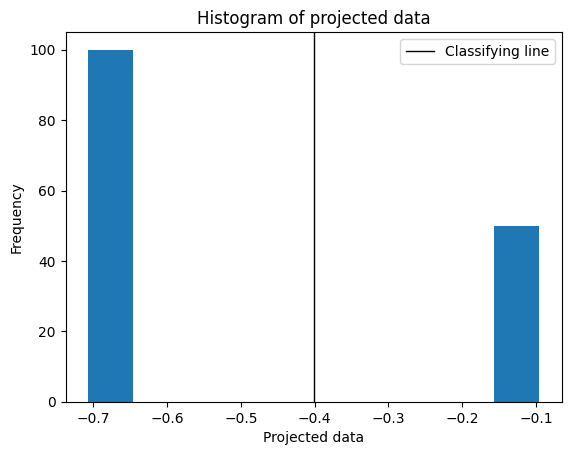

In [22]:
#Transform the data to \phi(X) as explained and find w and b
X_train = AIML_A1.q3_get_data(mysrn)
X=[]
Y=[]
for x in X_train:
  X.append(x[0])
  Y.append(x[1])
X=np.array(X)
X=np.hstack((X, X**2))

n=len(X[0])

sum0=np.zeros(n)
sum1=np.zeros(n)
count0=0
count1=0

for i in range(len(X)):
  if Y[i]==0:
    count0+=1
    sum0=sum0+X[i]
  if Y[i]==1:
    sum1=sum1+X[i]
    count1+=1
mean_0=sum0/count0
mean_1=sum1/(count1)

variance0=0
variance1=0
count0=0
count1=0

for i in range(len(X)):
    if Y[i]==0:
      diff0=(X[i]-mean_0)
      count0+=1
      variance0+=np.outer(diff0,diff0.T)
    if Y[i]==1:
      diff1=(X[i]-mean_1)
      count1+=1
      variance1+=np.outer(diff1,diff1.T)
variance0=variance0/count0
variance0=variance1/count1

S_w=variance0+variance1
S_b=mean_0-mean_1
InverseS_w=np.linalg.inv(S_w)
w=np.matmul(InverseS_w,S_b)
w=w/np.linalg.norm(w)

print(w)
b = (mean_0 @ w + mean_1 @ w) / 2
print(b)
projected_data = X @ w



plt.hist(projected_data)
plt.xlabel("Projected data")
plt.ylabel("Frequency")
plt.axvline(x=b, color='black',  linewidth=1, label="Classifying line")
plt.title("Histogram of projected data")
plt.legend()
plt.show()



[-0.40143898]


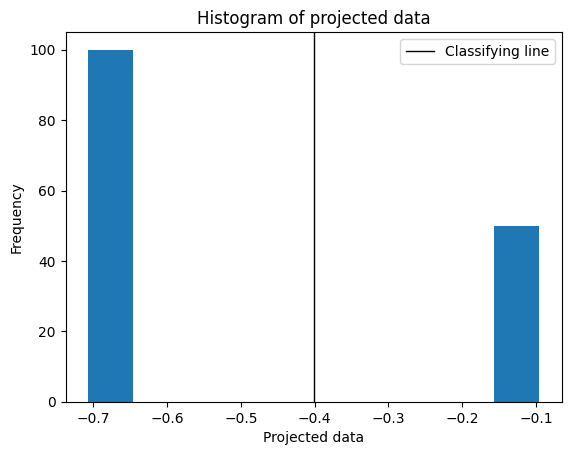

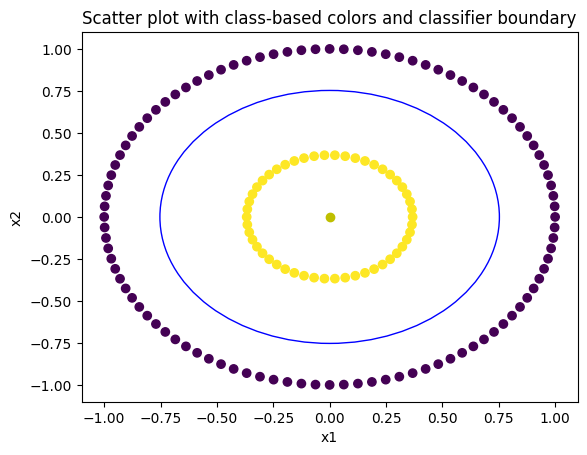

In [27]:
#Plot original data along with classifier boundary
import math
W=np.array([[0],[0],[-0.707106781],[-0.70710678]])
X_train = AIML_A1.q3_get_data(mysrn)
X=[]
Y=[]
for x in X_train:
  X.append(x[0])
  Y.append(x[1])
X=np.array(X)
X=np.hstack((X, X**2))
projected_data=X @ W
b = (mean_0 @ W + mean_1 @ W) / 2
print(b)

# plt.hist(class_0, label="class_0", density=True)
# plt.hist(class_1, label="class_1", density=True)

# # Add vertical line at the calculated threshold (b)
# plt.axvline(x=b, color='black',  linewidth=1, label="Classifying line")

# # Add labels and title
# plt.xlabel("Projected Value")
# plt.ylabel("Density")
# plt.title("Histogram of Projected Data (Normalized)")

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()
Y = [data[1] for data in X_train]
plt.hist(projected_data)

plt.xlabel("Projected data")
plt.ylabel("Frequency")
plt.axvline(x=b, color='black',  linewidth=1, label="Classifying line")
plt.title("Histogram of projected data")
plt.legend()
plt.show()

x1_data = [data[0] for data in X]  # Extract x1 values
x2_data = [data[1] for data in X]
# Create scatter plot with color based on class
plt.scatter(x1_data, x2_data, c=Y, cmap='viridis')  # Adjust 'viridis' to your desired colormap

# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot with class-based colors and classifier boundary")
radius=math.sqrt(0.567)
circle1=plt.Circle((0, 0), 0.7529, color='b', fill=False)
ax = plt.gca()
ax.plot((0), (0), 'o', color='y')

ax.add_patch(circle1)

# Show the plot
plt.show()

In [28]:
#Load Test dataset
help(AIML_A1.q3_get_test_data)
test_data_for_fisher = AIML_A1.q3_get_test_data(mysrn)
print(test_data_for_fisher[:5])

Help on function q3_get_test_data in module oracle:

q3_get_test_data(srn: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Help:This function returns the test dataset for question 4
    It returns a list containing all the data points. Each entry of the list is a tuple of two elements; 
    the first element is the 2-dimensional data $[x_1,x_2]$, and the second element is the label ($1$ or $0$).

[(array([-0.90703602, -0.13092747]), 0.0), (array([ 0.22623734, -0.23214826]), 1.0), (array([0.8957163 , 0.11293441]), 0.0), (array([0.22701127, 0.06816898]), 1.0), (array([-0.50302734, -0.02655685]), 1.0)]


In [57]:
def phi(X_train):
  X=[]
  Y=[]
  for x in X_train:
    X.append(x[0])
    Y.append(x[1])
  X=np.array(X)
  X=np.hstack((X, X**2))
  value=[]
  value.append(X)
  value.append(Y)
  return value

In [70]:
#Find Test Accuracy for various values of thresholds as explained.

newthresholds= [b-0.3,b-0.2,b-0.1,b,b+0.1,b+0.2,b+0.3]
error=[]
transformdata=phi(test_data_for_fisher)
print(len(test_data_for_fisher))
for i in range(7):
  count=0
  for j in range(len(transformdata[0])):
    if transformdata[0][j] @ W- newthresholds[i] <=0:
      val=0
    if transformdata[0][j] @ W - newthresholds[i] > 0:
      val=1
    if val!=transformdata[1][j]:
      count+=1
  print("total count is",count)
  error.append(count)
print(error)


100
total count is 20
total count is 15
total count is 7
total count is 7
total count is 6
total count is 13
total count is 30
[20, 15, 7, 7, 6, 13, 30]


#Question 4 : Logistic Regression

In [73]:
#Loading Dataset
import numpy as np
import csv

#Loading Data
with open('diabetes.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data = list(reader)
diabetes_data = np.array(diabetes_data)


diabetes_data =  diabetes_data[1:,]

[['Pregnancies' 'Glucose' 'BloodPressure' ... 'DiabetesPedigreeFunction'
  'Age' 'Outcome']
 ['6' '148' '72' ... '0.627' '50' '1']
 ['1' '85' '66' ... '0.351' '31' '0']
 ...
 ['1' '89' '24' ... '0.559' '21' '0']
 ['1' '173' '74' ... '0.088' '38' '1']
 ['1' '109' '38' ... '0.407' '26' '0']]


In [110]:
#Import required modules for logistic regression from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [146]:
# Implement K-Fold Cross Validation K=6

x = np.array([i[0:len(i)-1] for i in diabetes_data],dtype=np.float64)
y = np.array([i[-1] for i in diabetes_data],dtype=np.float64)

k=6 #number of folds

kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(max_iter =1000)

acc_score = []

for train_index , test_index in kf.split(x):
    x_train , x_test = x[train_index],x[test_index]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(acc_score)
print("K-Fold Cross-Validation Scores:", acc_score)
print("Mean Accuracy:", mean_accuracy)


K-Fold Cross-Validation Scores: [0.75, 0.81, 0.72, 0.78, 0.76, 0.85]
Mean Accuracy: 0.7783333333333333


In [121]:
#Defining Confusion Matrix
def confusionmatrix(y_actual,y_prediction):
  A=np.zeros((2,2)) #evaluate confusion matrix using true value and false value
  for i in range(len(y_actual)):
    if y_actual[i]==1 and y_prediction[i]==1:
      A[1][1]+=1
    if y_actual[i]==0 and y_prediction[i]==0:
      A[0][0]+=1
    if y_actual[i]==0 and y_prediction[i]==1:
      A[0][1]+=1
    if y_actual[i]==1 and y_prediction[i]==0:
      A[1][0]+=1
  return A

In [125]:
#Evaluate confusion matrix for every k model
Final_confusion_matrix=[]
Recall=[]
Precision=[]
F1_score=[]

kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(max_iter =1000)

for train_index , test_index in kf.split(x):
    x_train , x_test = x[train_index],x[test_index]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)

    Final_confusion_matrix.append(confusionmatrix(y_test,pred_values))
    tp = np.sum(y_test * pred_values)
    fp = np.sum((1-y_test) * pred_values)
    fn = np.sum(y_test * (1-pred_values))
    Recall.append(tp/(tp+fn))
    Precision.append(tp/(tp+fp))
    F1_score.append(2*tp/(2*tp+fp+fn))


print(Final_confusion_matrix)
print(Recall)
print(Precision)
print(F1_score)

[array([[54.,  9.],
       [16., 21.]]), array([[59.,  3.],
       [16., 22.]]), array([[48., 13.],
       [15., 24.]]), array([[57.,  5.],
       [17., 21.]]), array([[60., 10.],
       [14., 16.]]), array([[69.,  5.],
       [10., 16.]])]
[0.5675675675675675, 0.5789473684210527, 0.6153846153846154, 0.5526315789473685, 0.5333333333333333, 0.6153846153846154]
[0.7, 0.88, 0.6486486486486487, 0.8076923076923077, 0.6153846153846154, 0.7619047619047619]
[0.6268656716417911, 0.6984126984126984, 0.631578947368421, 0.65625, 0.5714285714285714, 0.6808510638297872]


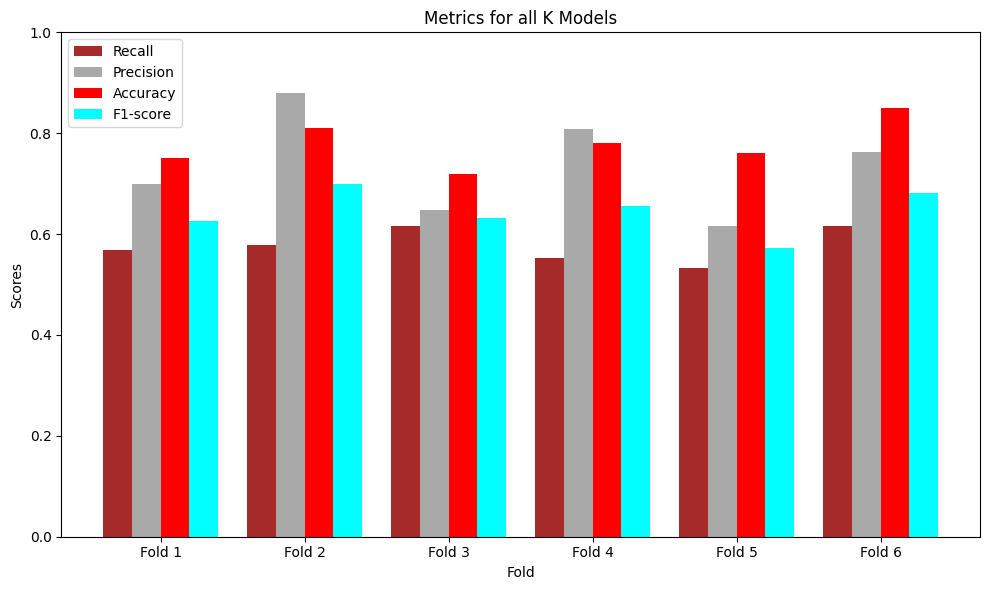

In [134]:
# Plot barplot for all metrics using matplotlib
import matplotlib.pyplot as plt

acc_score=[0.75, 0.81, 0.72, 0.78, 0.76, 0.85]

labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, Recall, width, label='Recall', color='brown')
rects2 = ax.bar(x - 0.5*width, Precision, width, label='Precision', color='darkgrey')
rects3 = ax.bar(x + 0.5*width, acc_score, width, label='Accuracy', color='red')
rects4 = ax.bar(x + 1.5*width, F1_score, width, label='F1-score', color='aqua')

ax.set_xlabel('Fold')
ax.set_ylabel('Scores')
ax.set_title('Metrics for all K Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [137]:
# Load testdata
import numpy as np
import csv

#Loading Data
with open('q4testdata_999601410.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data = np.array(data)

data =  data[1:,]
print(data)

[['1' '108' '88' ... '27.1' '0.4' '24']
 ['6' '96' '0' ... '23.7' '0.19' '28']
 ['1' '124' '74' ... '27.8' '0.1' '30']
 ...
 ['5' '121' '72' ... '26.2' '0.245' '30']
 ['1' '126' '60' ... '30.1' '0.349' '47']
 ['1' '93' '70' ... '30.4' '0.315' '23']]


In [153]:
#Predict testdata and save into test_result.csv

x = np.array([i[0:len(i)-1] for i in data],dtype=np.float64)
y = np.array([i[-1] for i in data],dtype=np.float64)

k=10 #number of folds

kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(max_iter =1000000)

acc_score = []

for train_index , test_index in kf.split(x):
    x_train , x_test = x[train_index],x[test_index]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(x_train,y_train)

pred_values=model.predict(x)
with open('test_result.csv','a') as f:
  for pred in pred_values:
    f.write(str(pred)+'\n')

# # y_pred is name for prediction data
np.savetxt('test_result.csv', pred_values, fmt='%s')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Test predictions saved successfully to 'test_result.csv'!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
